Q.1 AND Q.2

In [ ]:
!wget -O yolov3.cfg https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
!wget -O yolov3.weights https://pjreddie.com/media/files/yolov3.weights
!wget -O coco.names https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names

--2025-03-20 08:50:32--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg’

yolov3.cfg          100%[===================>]   8.15K  --.-KB/s    in 0s      

2025-03-20 08:50:32 (46.5 MB/s) - ‘yolov3.cfg’ saved [8342/8342]

--2025-03-20 08:50:32--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  10.7MB/s    in 18s     

2025-03-20 08:5

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

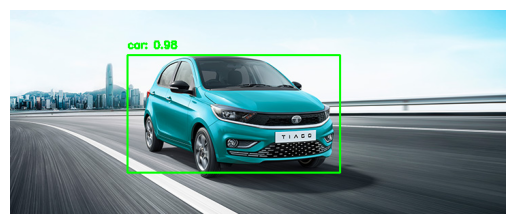

In [ ]:
# Load YOLOv3 model
net = cv2.dnn.readNet("/content/yolov3.weights", "/content/yolov3.cfg")
layer_names = net.getLayerNames()
out_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

# Load COCO class labels
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

# Load image
image = cv2.imread("/content/lifestyle-02.jpg")
h, w = image.shape[:2]

# Prepare image for YOLOv3
blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB=True, crop=False)
net.setInput(blob)
outs = net.forward(out_layers)

# Process YOLOv3 output
conf_threshold = 0.5
nms_threshold = 0.4
boxes, confidences, class_ids = [], [], []

for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > conf_threshold:
            center_x, center_y, width, height = (detection[0:4] * np.array([w, h, w, h])).astype("int")
            x, y = int(center_x - width / 2), int(center_y - height / 2)
            boxes.append([x, y, int(width), int(height)])
            confidences.append(float(confidence))
            class_ids.append(class_id)

# Apply Non-Maximum Suppression
indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)
for i in indices.flatten():
    x, y, w, h = boxes[i]
    label = f"{classes[class_ids[i]]}: {confidences[i]:.2f}"
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Show output image
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display image using Matplotlib
plt.imshow(image_rgb)
plt.axis("off")  # Hide axis
plt.show()

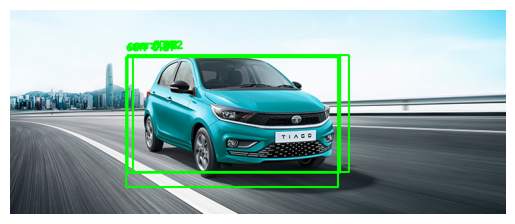

In [ ]:
image = cv2.imread("/content/lifestyle-02.jpg")
h, w = image.shape[:2]

# Prepare image for YOLOv3
blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB=True, crop=False)
net.setInput(blob)
outs = net.forward(out_layers)
conf_threshold = 0.5
boxes, confidences, class_ids = [], [], []

for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > conf_threshold:
            center_x, center_y, width, height = (detection[0:4] * np.array([w, h, w, h])).astype("int")
            x, y = int(center_x - width / 2), int(center_y - height / 2)
            boxes.append([x, y, int(width), int(height)])
            confidences.append(float(confidence))
            class_ids.append(class_id)

# Draw bounding boxes WITHOUT NMS
for i in range(len(boxes)):
    x, y, w, h = boxes[i]
    label = f"{classes[class_ids[i]]}: {confidences[i]:.2f}"
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Show output image
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display image using Matplotlib
plt.imshow(image_rgb)
plt.axis("off")  # Hide axis
plt.show()
